# Basic Image Operations like:
Copying and creating new images, Cropping ROI, Resizing, Creating Binary Maks

In [1]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

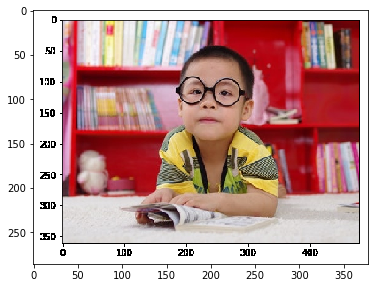

In [4]:
# Read Image
image=cv2.imread("download.png")

# Display the image
plt.imshow(image[:,:,::-1])

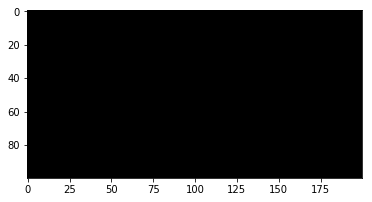

In [5]:
# Create Image Copy
imageCopy=image.copy()

# Create Empty Matrix with size(100,200)
emptyMatrix=np.zeros((100,200,3),dtype='uint8')
plt.imshow(emptyMatrix)

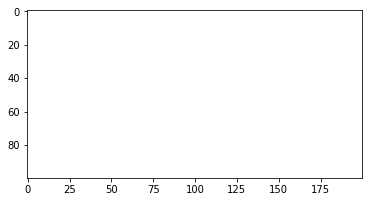

In [6]:
# Fill it with white pixels
emptyMatrix=255*np.ones((100,200,3),dtype='uint8')
plt.imshow(emptyMatrix)

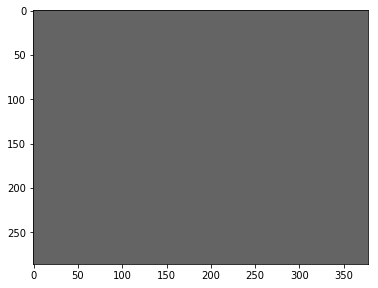

In [7]:
# Create empty matrix of the same size as original image
# Fill it with 100
emptyOriginal=100*np.ones_like(image)
plt.imshow(emptyOriginal)

# Cropping an Image Section - ROI

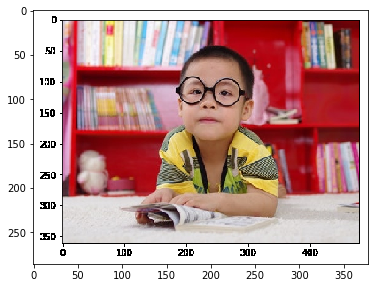

In [8]:
# Read the Image
image=cv2.imread("download.png")
# Display it
plt.imshow(image[:,:,::-1])

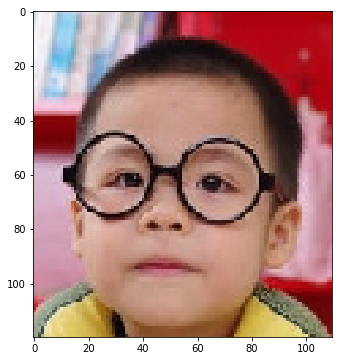

In [17]:
# Crop the face
# Crop a rectangle
# x coordinate=150 to 260
# y coordinate = 30 to 150
crop=image[30:150,150:260]
plt.imshow(crop[:,:,::-1])

# Copy a region to other region

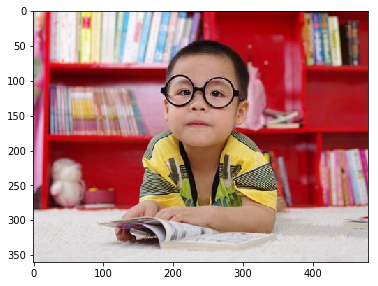

In [54]:
# Read the Image
image=cv2.imread("boy.jpg")

# Create copy of original image
copiedImg=image.copy()
plt.imshow(copiedImg[:,:,::-1])

Text(0.5,1,'Processed Image')

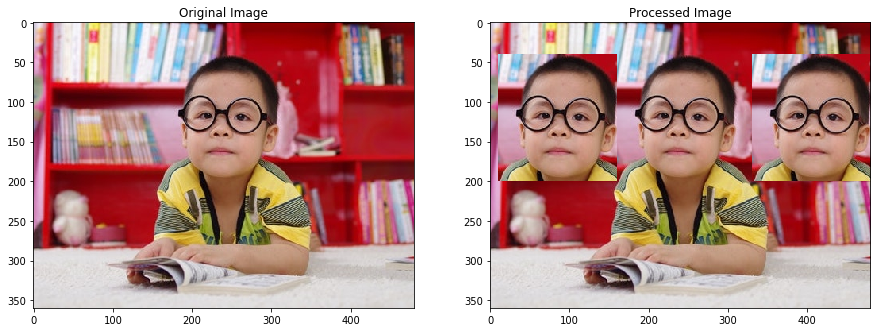

In [56]:
# Copy the cropped face to lef and right of the copied image
copyRoi=image[40:200,160:310]
#plt.subplot(121);plt.imshow(copyRoi[:,:,::-1]);plt.title("ROI Image")

# Find height and widh or the ROI
# image.shape gives rows, columns, and channels
roiHeight, roiWidth=copyRoi.shape[:2]

# Copy to the left of the face
copiedImg[40:40+roiHeight,10:10+roiWidth]=copyRoi
# Copy to the right of the face
copiedImg[40:40+roiHeight,330:330+roiWidth]=copyRoi

# Display the output
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(copiedImg[:,:,::-1]);plt.title("Processed Image")

# Image Resizing
Two Methods:
1) Specify width and height: aspect ratio is not preserved
2) Scaling factor: aspect ration is preserved

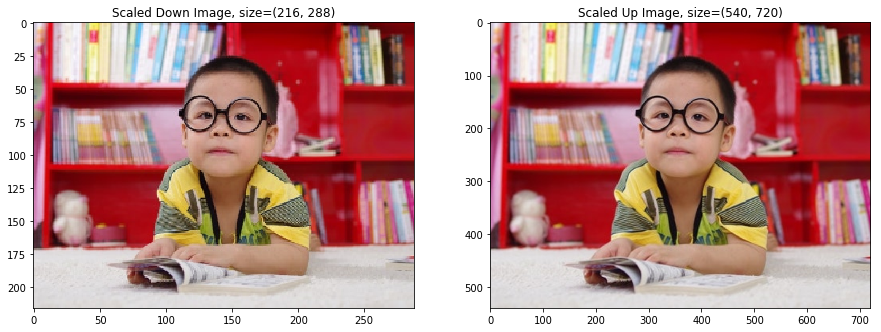

In [59]:
# Using scaline factor

# Scale up the image 1.5 times
scaleUpX=1.5
scaleUpY=1.5

# Scale down 0.6 times using a single factor
scaleDown=0.6

scaledDownImage=cv2.resize(image,None,fx=scaleDown,fy=scaleDown,interpolation=cv2.INTER_LINEAR)
scaledUpImage=cv2.resize(image,None,fx=scaleUpX,fy=scaleUpY,interpolation=cv2.INTER_LINEAR)

# Display the images
plt.figure(figsize=[15,15])
plt.subplot(121);
plt.imshow(scaledDownImage[:,:,::-1]);
plt.title("Scaled Down Image, size={}".format(scaledDownImage.shape[:2]));

plt.subplot(122);
plt.imshow(scaledUpImage[:,:,::-1]);
plt.title("Scaled Up Image, size={}".format(scaledUpImage.shape[:2]));

# Creating an Image Mask

Creating a mask using coordinates

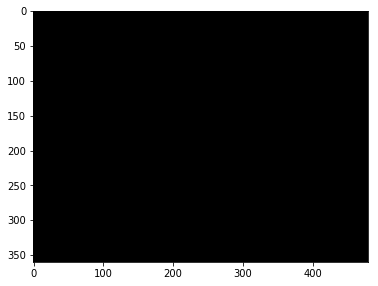

In [61]:
# Create an empty image of same size as original image
mask1=np.zeros_like(image)
plt.imshow(mask1)

uint8


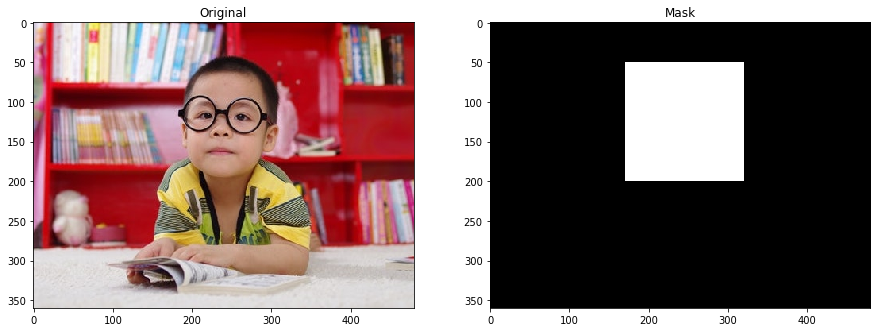

In [62]:
mask1[50:200,170:320]=255 #face region mask
plt.figure(figsize=[15,15])
plt.subplot(121); plt.imshow(image[:,:,::-1]); plt.title("Original");
plt.subplot(122); plt.imshow(mask1[:,:,::-1]); plt.title("Mask");
print(mask1.dtype)

Creating a mask using color intensity
Suppose, we want to focus on red pixels:
1) Red chnannel should have high intensity  ( keep the range of pixel values from 150 to 255 )
2) The other 2 channels should have low intensity ( keep the range of pixel values in Blue and Green channels between 0 to 100)

Text(0.5,1,'Masked Image')

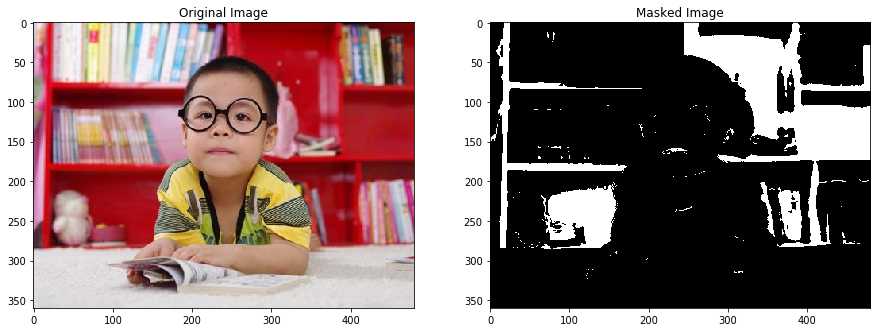

In [63]:
mask2=cv2.inRange(image,(0,0,150),(100,100,255))
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(mask2);plt.title("Masked Image")